Table 1. Proportion of Stopwords within Top-|L| Words


,Corpus,Overlap,TopN,Ratio,Ratio %
0,WebText,92,198,0.464646,46.46
1,Senseval-2,99,198,0.500000,50.00
2,Treebank-as-proxy-for-NomBank,81,198,0.409091,40.91


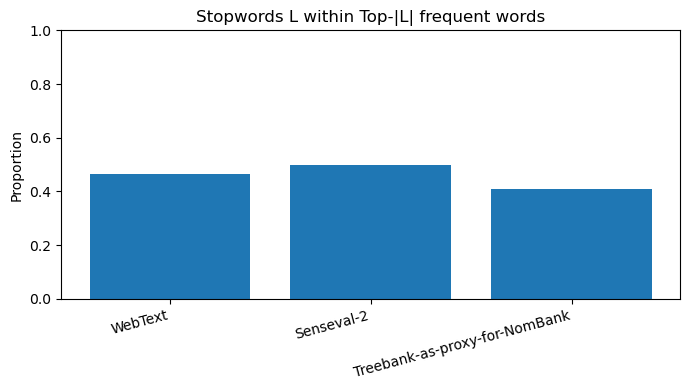


Proposed consensus stopword list (>=2 corpora) — count: 93
['a', 'about', 'after', 'all', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'both', 'but', 'by', 'can', 'did', 'do', 'does', 'don', 'down', 'each', 'for', 'from', 'had', 'has', 'have', 'he', 'her', 'him', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'more', 'most', 'my', 'no', 'not', 'now', 'of', 'off', 'on', 'only', 'or', 'other', 'out', 'over', 'own', 's', 'she', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'this', 'those', 'to', 'too', 'under', 'up', 'very', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'will', 'with', 'you', 'your']

Saved files (relative):
- artifacts/spec1_stopword_proportions.csv
- artifacts/spec1_stopword_proportions.png
- artifacts/spec1_consensus_2of3_stopwords.csv


In [1]:
# Project 1A — Spec 1 (single compact cell, saves all outputs to artifacts/)
# Task: For NLTK English stopwords L, compute the proportion of L inside the Top-|L| frequent words
# for WebText, Senseval-2, and Treebank (as proxy for NomBank). Show table + bar plot.
# Also save a "consensus" stopword list (words appearing in Top-|L| of at least 2 corpora).

import os, nltk, pandas as pd, matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display

# --- resolve artifacts/ path (works when running from notebooks/ or root) ---
cwd_name = os.path.basename(os.getcwd())
ART_DIR = os.path.abspath("../artifacts" if cwd_name == "notebooks" else "./artifacts")
os.makedirs(ART_DIR, exist_ok=True)

# --- ensure corpora are available (safe to re-run) ---
for pkg in ['stopwords','webtext','treebank','senseval']:
    nltk.download(pkg, quiet=True)

from nltk.corpus import stopwords, webtext, treebank, senseval

# --- helpers ---
def clean_count(tokens):
    """Lowercase, keep alphabetic tokens only, then return frequency Counter."""
    toks = (t.lower() for t in tokens)
    toks = [t for t in toks if t.isalpha()]
    return Counter(toks)

def top_n_words(counter, n):
    """Return the top-n words by raw frequency."""
    return [w for w,_ in counter.most_common(n)]

def overlap_count_and_ratio(top_words, stop_set):
    """Return overlap count and ratio of stopwords inside top_words."""
    k = sum(1 for w in top_words if w in stop_set)
    return k, (k / len(top_words) if top_words else 0.0)

def senseval_tokens():
    """Extract tokens from Senseval-2 (instances -> context)."""
    toks = []
    for fid in senseval.fileids():                 # 'hard.pos', 'interest.pos', 'serve.pos'
        for inst in senseval.instances(fid):
            for x in inst.context:                 # context has strings or (word, POS)
                toks.append(x[0] if isinstance(x, tuple) else x)
    return toks

# --- data & stopwords ---
L = set(stopwords.words('english'))      # stopword set L
TopN = len(L)                            # |L|

web_tokens = [w for fid in webtext.fileids() for w in webtext.words(fid)]
sen_tokens = senseval_tokens()
tre_tokens = list(treebank.words())      # proxy for NomBank

# --- frequency + Top-|L| words ---
freq_web, freq_sen, freq_tre = map(clean_count, (web_tokens, sen_tokens, tre_tokens))
top_web, top_sen, top_tre   = (top_n_words(freq_web, TopN),
                               top_n_words(freq_sen, TopN),
                               top_n_words(freq_tre, TopN))

# --- proportions (Spec 1 core) ---
ov_w, r_w = overlap_count_and_ratio(top_web, L)
ov_s, r_s = overlap_count_and_ratio(top_sen, L)
ov_t, r_t = overlap_count_and_ratio(top_tre, L)

results = pd.DataFrame({
    "Corpus":  ["WebText","Senseval-2","Treebank-as-proxy-for-NomBank"],
    "Overlap": [ov_w, ov_s, ov_t],
    "TopN":    [TopN, TopN, TopN],
    "Ratio":   [r_w, r_s, r_t]
})
results["Ratio %"] = (results["Ratio"]*100).round(2)

# --- display table ---
print("Table 1. Proportion of Stopwords within Top-|L| Words")
display(results)

# --- bar plot + save ---
plt.figure(figsize=(7,4))
plt.bar(results["Corpus"], results["Ratio"])
plt.ylim(0,1)
plt.title("Stopwords L within Top-|L| frequent words")
plt.ylabel("Proportion")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plot_path = os.path.join(ART_DIR, "spec1_stopword_proportions.png")
plt.savefig(plot_path, dpi=150)
plt.show()

# --- consensus stopword list (appear in Top-|L| of >= 2 corpora) ---
in_web = set(w for w in top_web if w in L)
in_sen = set(w for w in top_sen if w in L)
in_tre = set(w for w in top_tre if w in L)
consensus_2of3 = sorted((in_web & in_sen) | (in_web & in_tre) | (in_sen & in_tre))

print(f"\nProposed consensus stopword list (>=2 corpora) — count: {len(consensus_2of3)}")
print(consensus_2of3)

# --- save CSVs ---
csv_results   = os.path.join(ART_DIR, "spec1_stopword_proportions.csv")
csv_consensus = os.path.join(ART_DIR, "spec1_consensus_2of3_stopwords.csv")

results.to_csv(csv_results, index=False)
pd.DataFrame({"word": consensus_2of3}).to_csv(csv_consensus, index=False)

print("\nSaved files (relative):")
print(f"- artifacts/{os.path.basename(csv_results)}")
print(f"- artifacts/{os.path.basename(plot_path)}")
print(f"- artifacts/{os.path.basename(csv_consensus)}")
